In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.linalg import svd
import itertools
from statsmodels.api import OLS, add_constant

## Part 1. Ordinary Least Squares (OLS) Estimation

#### 1) Estimate Regression Coefficients

In [2]:
linthurst_data = pd.read_csv('LINTHALL.csv')

# Ordinary Least Squares Estimation
X = linthurst_data[['H2S', 'SAL', 'Eh7', 'pH', 'BUF', 'P', 'K', 'Ca', 'Mg', 'Na', 'Mn', 'Zn', 'Cu', 'NH4']]
Y = linthurst_data['BIO']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

summary = model.summary()

# Calculate the SSE
sse = np.sum(model.resid**2)

# Calculate the sum of standard errors of coefficients
sum_standard_errors = np.sum(model.bse[1:])  # Excluding the intercept

# Print the OLS summary, SSE, and sum of standard errors
print(f"Standard Error Sum (SSE): {sse}")
print(f"Sum of Standard Errors of Coefficients: {sum_standard_errors}")
print(' ')
print(summary)

Standard Error Sum (SSE): 3276740.2803900684
Sum of Standard Errors of Coefficients: 628.529003575566
 
                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     9.270
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           4.03e-07
Time:                        19:21:08   Log-Likelihood:                -302.70
No. Observations:                  43   AIC:                             635.4
Df Residuals:                      28   BIC:                             661.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [15]:
linthurst_data

,Obs,Loc,Type,BIO,H2S,SAL,Eh7,pH,BUF,P,K,Ca,Mg,Na,Mn,Zn,Cu,NH4
0,1,OI,DVEG,676,-610,33,-290,5.00,2.34,20.238,1441.67,2150.00,5169.05,35184.5,14.2857,16.4524,5.02381,59.524
1,2,OI,DVEG,516,-570,35,-268,4.75,2.66,15.591,1299.19,1844.76,4358.03,28170.4,7.7285,13.9852,4.19019,51.378
2,3,OI,DVEG,1052,-610,32,-282,4.20,4.18,18.716,1154.27,1750.36,4041.27,26455.0,17.8066,15.3276,4.79221,68.788
3,4,OI,DVEG,868,-560,30,-232,4.40,3.60,22.821,1045.15,1674.36,3966.08,25072.9,49.1538,17.3128,4.09487,82.256
4,5,OI,DVEG,1008,-610,33,-318,5.55,1.90,37.843,521.62,3360.02,4609.39,31664.2,30.5229,22.3312,4.60131,70.904
5,6,OI,SHRT,436,-620,33,-308,5.05,3.22,27.381,1273.02,1811.11,4389.84,25491.7,9.7619,12.2778,4.50794,54.206
6,7,OI,SHRT,544,-590,36,-264,4.25,4.50,21.284,1346.35,1906.63,4579.33,20877.3,25.7371,17.8225,4.91093,84.982
7,8,OI,SHRT,680,-610,30,-340,4.45,3.50,16.511,1253.88,1860.29,3983.09,25621.3,10.0267,14.3516,5.11364,53.275
8,9,OI,SHRT,640,-580,38,-252,4.75,2.62,18.199,1242.65,1799.02,4142.40,27587.3,9.0074,13.6826,4.64461,47.733
9,10,OI,SHRT,492,-610,30,-288,4.60,3.04,19.321,1281.95,1796.66,4263.93,26511.7,12.7140,11.7566,4.58761,60.674


#### 2) Collinearity Diagnostics - VIFs

In [3]:
# Calculating VIF for each predictor
vif_data_full = pd.DataFrame()
vif_data_full["Predictors"] = X.columns
vif_data_full["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying VIF results
print(vif_data_full)


   Predictors          VIF
0       const  4350.771896
1         H2S     3.136506
2         SAL     3.361283
3         Eh7     1.964076
4          pH    62.564383
5         BUF    33.478422
6           P     2.884226
7           K     7.432133
8          Ca    17.343432
9          Mg    24.476419
10         Na    10.372624
11         Mn     6.737786
12         Zn    12.391033
13         Cu     4.866983
14        NH4     8.586275


#### 2) Collinearity Diagnostics - Condition indices

In [4]:
# Standardizing the predictors, excluding the constant term
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X.iloc[:, 1:])  # Exclude the constant for standardization

# Singular Value Decomposition (SVD) of the standardized data
U, s, Vt = svd(X_standardized)

# Largest singular value
largest_singular_value = s[0]

# Calculating condition indices
condition_indices = [largest_singular_value / singular_value for singular_value in s]

# Matching condition indices to feature names, excluding the constant term
feature_names = X.columns[1:]  # Exclude the constant term

# Creating a DataFrame with feature names and their corresponding condition indices
condition_indices_df = pd.DataFrame({
    'Predictors': feature_names,
    'Condition Index': condition_indices
})

# Printing the DataFrame
print(condition_indices_df.to_string(index=False))


Predictors  Condition Index
       H2S         1.000000
       SAL         1.184103
       Eh7         1.791479
        pH         2.048414
       BUF         2.733624
         P         3.241408
         K         3.696482
        Ca         4.447720
        Mg         5.687906
        Na         6.009633
        Mn         7.842823
        Zn        10.674971
        Cu        13.561188
       NH4        23.308398


## Part 2. Use Principle Components Regression (PCR)

#### 1) Use Principal Components Regression (PCR) method with collinearity reduction.

In [5]:
# Define the features (X) and the target variable (y)
X = linthurst_data[['H2S', 'SAL', 'Eh7', 'pH', 'BUF', 'P', 'K', 'Ca', 'Mg', 'Na', 'Mn', 'Zn', 'Cu', 'NH4']]
y = linthurst_data[['BIO']]

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Regress standardized Y on all principal components
lin_reg = LinearRegression()
lin_reg.fit(principal_components, y)
theta_j = lin_reg.coef_

# Explained Variance Ratio of Each Principal Component
explained_variance = pca.explained_variance_ratio_

# Calculate the eigenvalues
eigenvalues = pca.explained_variance_

# Calculate the condition indices
largest_eigenvalue = eigenvalues[0]
condition_indices = np.sqrt(largest_eigenvalue / eigenvalues)

# Create DataFrames for coefficients, explained variance, and condition indices
coefficients_df = pd.DataFrame(theta_j, columns=X.columns)
explained_variance_df = pd.DataFrame(explained_variance, index=X.columns, columns=['Explained Variance'])
condition_indices_df = pd.DataFrame(condition_indices, index=X.columns, columns=['Condition Index'])

# Display the results
print("Coefficients θj in the Standardized Model:")
print(coefficients_df)
print("\nExplained Variance Ratio of Each Principal Component:")
print(explained_variance_df)
print("\nCondition Index of Each Principal Component:")
print(condition_indices_df)

# Looking at the theta_j, column 'P' has insignificant and explained variance is low, so better to excluded.
# Also, column 'NH4' condition index is greater than 15, there can be collinearity exists. so will exclude.


Coefficients θj in the Standardized Model:
         H2S        SAL         Eh7          pH        BUF         P  \
0  211.75609 -79.789789 -105.921327  118.530564 -65.106255 -0.242776   

            K         Ca          Mg          Na          Mn         Zn  \
0  263.530008 -52.807876  349.583378  174.118541  258.838493  186.25233   

           Cu         NH4  
0  196.818913  163.294501  

Explained Variance Ratio of Each Principal Component:
     Explained Variance
H2S            0.369445
SAL            0.263494
Eh7            0.115113
pH             0.088047
BUF            0.049439
P              0.035163
K              0.027038
Ca             0.018676
Mg             0.011419
Na             0.010229
Mn             0.006006
Zn             0.003242
Cu             0.002009
NH4            0.000680

Condition Index of Each Principal Component:
     Condition Index
H2S         1.000000
SAL         1.184103
Eh7         1.791479
pH          2.048414
BUF         2.733624
P           3.2414

#### 2) Compare the standard error sum and SSE with their counterparts in Part I

In [6]:
X = linthurst_data[['H2S', 'SAL', 'Eh7', 'pH', 'BUF', 'P', 'K', 'Ca', 'Mg', 'Na', 'Mn', 'Zn', 'Cu', 'NH4']]
y = linthurst_data['BIO'] # Excluding 'P' and 'NH4', and assuming 'BIO' is the target

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Excluding the components corresponding to 'P' and 'NH4'
# Assuming 'P' and 'NH4' are the 6th and 14th columns in the original data
excluded_indices = [5, 13] 
included_indices = [i for i in range(principal_components.shape[1]) if i not in excluded_indices]
selected_principal_components = principal_components[:, included_indices]

# Fit a linear regression model using the selected principal components
lin_reg = LinearRegression()
lin_reg.fit(selected_principal_components, y)

# Calculate predictions using the fitted model
y_pred = lin_reg.predict(selected_principal_components)

# Compute the Sum of Squared Errors (SSE)
SSE = np.sum((y - y_pred) ** 2)

# Compute Standard Error of the estimate (SEE)
SEE = np.sqrt(mean_squared_error(y, y_pred))

# Calculate standard errors of the coefficients (s.e.(β̂j))
selected_X_pca_transposed = np.transpose(selected_principal_components)
MSE = SEE ** 2
var_cov_matrix = np.linalg.inv(np.dot(selected_X_pca_transposed, selected_principal_components)) * MSE
standard_errors = np.sqrt(np.diag(var_cov_matrix))

# Output the SSE and standard errors
print("Sum of Squared Errors (SSE):", SSE)
print("Standard Errors of the Coefficients:")
for i, se in enumerate(standard_errors, 1):
    print(f"s.e.(β̂_{i}): {se}")


Sum of Squared Errors (SSE): 3287657.542488552
Standard Errors of the Coefficients:
s.e.(β̂_1): 18.541127672701244
s.e.(β̂_2): 21.954607722598457
s.e.(β̂_3): 33.21604517681828
s.e.(β̂_4): 37.979912316268276
s.e.(β̂_5): 50.68446649294327
s.e.(β̂_6): 68.53694945916295
s.e.(β̂_7): 82.46574301595605
s.e.(β̂_8): 105.46018376016357
s.e.(β̂_9): 111.42536934798409
s.e.(β̂_10): 145.4147795921936
s.e.(β̂_11): 197.92599540395935
s.e.(β̂_12): 251.4397114448181


In [7]:
X = linthurst_data[['H2S', 'SAL', 'Eh7', 'pH', 'BUF', 'P', 'K', 'Ca', 'Mg', 'Na', 'Mn', 'Zn', 'Cu', 'NH4']]
y = linthurst_data['BIO'] # Excluding 'P' and 'NH4', and assuming 'BIO' is the target

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA for the full model
pca_full = PCA()
principal_components_full = pca_full.fit_transform(X_standardized)

# Fit the full model
lin_reg_full = LinearRegression()
lin_reg_full.fit(principal_components_full, y)
y_pred_full = lin_reg_full.predict(principal_components_full)
SSE_full = np.sum((y - y_pred_full) ** 2)
SEE_full = np.sqrt(mean_squared_error(y, y_pred_full))
var_cov_matrix_full = np.linalg.inv(np.dot(principal_components_full.T, principal_components_full)) * (SEE_full ** 2)
standard_errors_full = np.sqrt(np.diag(var_cov_matrix_full))
sum_se_full = np.sum(standard_errors_full)

# Apply PCA for the reduced model, excluding 'P' and 'NH4'
# Adjust indices for excluded components
excluded_indices = [5, 13] 
included_indices = [i for i in range(principal_components_full.shape[1]) if i not in excluded_indices]
principal_components_reduced = principal_components_full[:, included_indices]

# Fit the reduced model
lin_reg_reduced = LinearRegression()
lin_reg_reduced.fit(principal_components_reduced, y)
y_pred_reduced = lin_reg_reduced.predict(principal_components_reduced)
SSE_reduced = np.sum((y - y_pred_reduced) ** 2)
SEE_reduced = np.sqrt(mean_squared_error(y, y_pred_reduced))
var_cov_matrix_reduced = np.linalg.inv(np.dot(principal_components_reduced.T, principal_components_reduced)) * (SEE_reduced ** 2)
standard_errors_reduced = np.sqrt(np.diag(var_cov_matrix_reduced))
sum_se_reduced = np.sum(standard_errors_reduced)

# Output the results
print("Full Model - SSE:", SSE_full, ", Sum of Standard Errors:", sum_se_full)
print("Reduced Model - SSE:", SSE_reduced, ", Sum of Standard Errors:", sum_se_reduced)


Full Model - SSE: 3276740.280390065 , Sum of Standard Errors: 1614.6207173853195
Reduced Model - SSE: 3287657.542488552 , Sum of Standard Errors: 1125.0448914055673


## Part 3.

### 3.1) Stepwise Regression

#### 3.1.1) Check OLS Summary and Collinearity Diagnostics(VIF)

In [8]:
linth_5_data = pd.read_csv('LINTH-5.csv')

X = linth_5_data[['SAL','pH','K','Na','Zn']]
y = linth_5_data['BIO']

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     15.04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           4.60e-08
Time:                        19:21:08   Log-Likelihood:                -316.02
No. Observations:                  43   AIC:                             644.0
Df Residuals:                      37   BIC:                             654.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1282.2708   1268.254      1.011      0.3

In [9]:
# Calculating VIF for each predictor
vif_3 = pd.DataFrame()
vif_3["Predictors"] = X.columns
vif_3["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying VIF results
print(vif_3)

  Predictors         VIF
0      const  420.277700
1        SAL    2.099364
2         pH    3.327339
3          K    2.982513
4         Na    3.311625
5         Zn    4.309322


#### 3.1.2) Build Stepwise Regression and Report each step explicitly

In [10]:
X = linth_5_data[['SAL','pH','K','Na','Zn']]

def stepwise_selection(X, y, initial_list=[], threshold_in=0.1, threshold_out = 0.1, verbose=True):
    """
    Perform a forward-backward feature selection based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype='float')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                print(f"Compared to other variables:\n{new_pval.sort_values()}\n")
        else:
            if verbose:
                print("No additional predictors enter the model because their p-values did not meet the threshold.")
                print(f"Best p-value among excluded variables: {best_pval} (Threshold: {threshold_in})")
                print(f"Excluded variables and their p-values:\n{new_pval.sort_values()}\n")
                print(' ')
                print('-' * 100)
        
        # backward step
        if included and changed:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max()  # null if pvalues is empty
            if worst_pval > threshold_out:
                changed = True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            elif verbose:
                print("No variable dropped. Current model p-values:")
                print(pvalues.sort_values())
                print(' ')
                print('-' * 100)

        if not changed:
            break

    if verbose:
        print("Final model summary:")
        final_model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        print(final_model.summary())

    return included

resulting_features = stepwise_selection(X, y, verbose=True)
print(' ')
print('**Resulting features:')
print(resulting_features)


Add  pH                             with p-value 1.61671e-09
Compared to other variables:
pH     1.616712e-09
Zn     4.126330e-06
Na     9.500137e-02
K      2.082624e-01
SAL    6.365223e-01
dtype: float64

No variable dropped. Current model p-values:
pH    1.616712e-09
dtype: float64
 
----------------------------------------------------------------------------------------------------
Add  Na                             with p-value 0.0142458
Compared to other variables:
Na     0.014246
K      0.026971
Zn     0.272026
SAL    0.608300
dtype: float64

No variable dropped. Current model p-values:
pH    4.731149e-10
Na    1.424576e-02
dtype: float64
 
----------------------------------------------------------------------------------------------------
No additional predictors enter the model because their p-values did not meet the threshold.
Best p-value among excluded variables: 0.4302895702889037 (Threshold: 0.1)
Excluded variables and their p-values:
Zn     0.430290
K      0.641029
SAL  

#### 3.1.3) Check Collinearity Diagnostics(VIF) again after including 'pH' and 'Na' in the model

In [11]:
X = linth_5_data[['pH','Na']]
y = linth_5_data['BIO']
X = sm.add_constant(X)

# Calculating VIF for each predictor
vif_4 = pd.DataFrame()
vif_4["Predictors"] = X.columns
vif_4["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying VIF results
print(vif_4)


  Predictors        VIF
0      const  20.746465
1         pH   1.000558
2         Na   1.000558


### 3.2) Ridge Trace and Variable Selection

#### 3.2.1) Conduct Ridge regression, Plot Ridge Trace, and Select variable

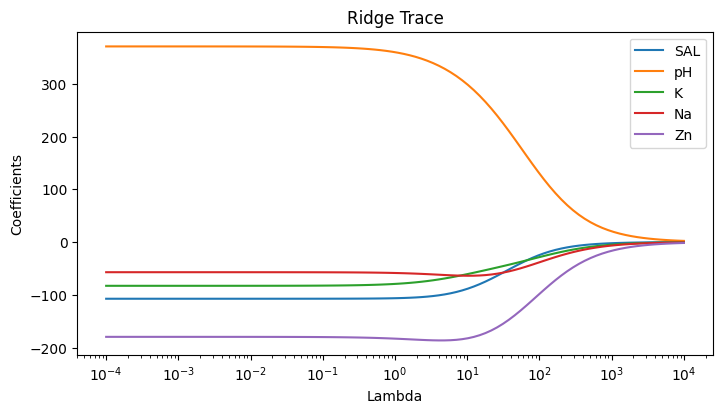

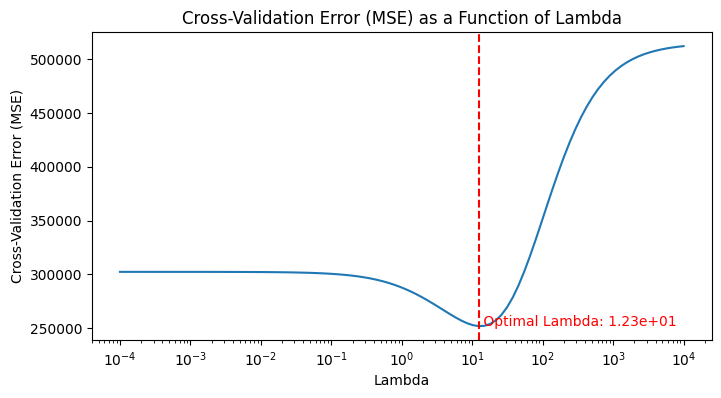

Optimal Lambda: 12.328467394420684
Cross-Validation Error (MSE) at Optimal Lambda: 251851.18925743346
 
  Predictors  Ridge Coefficients  OLS Coefficients
0        SAL          -84.358184       -107.539104
1         pH          287.982203        370.842749
2          K          -58.204827        -83.019174
3         Na          -63.851492        -57.225485
4         Zn         -179.922429       -179.789802


In [12]:
X = linth_5_data[['SAL','pH','K','Na','Zn']]
y = linth_5_data['BIO']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute Ridge Regression for a range of lambda values and plot the Ridge Trace
lambdas = np.logspace(-4, 4, 100)
coefficients = []
for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_scaled, y)
    coefficients.append(ridge.coef_)

# Plotting the Ridge Trace
plt.figure(figsize=(8.2, 4.2))
for i in range(X_scaled.shape[1]):
    plt.plot(lambdas, np.array(coefficients)[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Ridge Trace')
plt.legend()
plt.show()

# Perform K-Fold Cross-Validation to select optimal lambda
cv_errors = []
for l in lambdas:
    ridge = Ridge(alpha=l)
    scores = cross_val_score(ridge, X_scaled, y, scoring='neg_mean_squared_error', cv=10)
    cv_errors.append(-np.mean(scores))

min_error_lambda = lambdas[np.argmin(cv_errors)]
min_error = np.min(cv_errors)

# Plotting the Cross-Validation Errors against lambda values
plt.figure(figsize=(8, 4))
plt.plot(lambdas, cv_errors)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-Validation Error (MSE)')
plt.title('Cross-Validation Error (MSE) as a Function of Lambda')
plt.axvline(x=min_error_lambda, color='red', linestyle='--')
plt.text(min_error_lambda, min_error, f' Optimal Lambda: {min_error_lambda:.2e}', color='red')
plt.show()

# Printing the optimal lambda and its corresponding cross-validation error
print("Optimal Lambda:", min_error_lambda)
print("Cross-Validation Error (MSE) at Optimal Lambda:", min_error)
print(' ')

# Fit Ridge Regression with selected lambda
ridge_final = Ridge(alpha=min_error_lambda)
ridge_final.fit(X_scaled, y)

# Fit an Ordinary Least Squares (OLS) linear regression model
ols_model = LinearRegression()
ols_model.fit(X_scaled, y)

# Preparing a DataFrame to display the coefficients for both Ridge and OLS models
coefficients_df = pd.DataFrame({
    'Predictors': X.columns,
    'Ridge Coefficients': ridge_final.coef_,
    'OLS Coefficients': ols_model.coef_
})

# Displaying the coefficients
print(coefficients_df)


#### 3.2.2) Check Collinearity Diagnostics(VIF) again after including 'Na' and 'Zn' in the model

In [13]:
# Standardize the predictor variables - focusing only on 'Na' and 'Zn'
scaler = StandardScaler()
X_ols = X[['Na', 'Zn']]  # Extracting only 'Na' and 'Zn' from the original data
X_ols_scaled = scaler.fit_transform(X_ols)  # Standardizing these two predictors
X_ols_scaled_with_const = add_constant(X_ols_scaled)  # Adding a constant term for the OLS model

# Fit the OLS model
ols_model_specific = OLS(y, X_ols_scaled_with_const).fit()

# Calculate the VIFs for 'Na' and 'Zn'
vif_data_ols = pd.DataFrame()
vif_data_ols["Predictors"] = ['Constant', 'Na', 'Zn']
vif_data_ols["VIF"] = [variance_inflation_factor(X_ols_scaled_with_const, i) for i in range(X_ols_scaled_with_const.shape[1])]

# Printing the VIF values and the OLS coefficients
print(vif_data_ols)


  Predictors       VIF
0   Constant  1.000000
1         Na  1.015028
2         Zn  1.015028


### 3.3) Subset Selection

In [14]:
# Define the predictors and the response variable
X = linth_5_data[['SAL', 'pH', 'K', 'Na', 'Zn']]
y = linth_5_data['BIO']

# Initialize an empty list to store results for each model
results_list = []

# Iterate over all possible two-predictor combinations
for combo in itertools.combinations(X.columns, 2):
    # Select the current combination of variables and add a constant for the intercept
    X_combo = add_constant(linth_5_data[list(combo)])
    
    # Fit the OLS model
    model = OLS(y, X_combo).fit()
    
    # Calculate the BIC
    bic = model.bic
    
    # Calculate VIFs for the predictors in the current model
    vifs = [variance_inflation_factor(X_combo.values, i) for i in range(1, X_combo.shape[1])]
    
    # Append results to the list
    results_list.append({
        'Model': ' + '.join(combo),
        'BIC': bic,
        'Max VIF': max(vifs)
    })

    # Print the results for the current model
    print(f"Model: {' + '.join(combo)}")
    print(f"BIC: {bic}")
    print(f"Max VIF: {max(vifs)}")
    print('-' * 30)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Find the model with the lowest BIC
best_model = results_df.loc[results_df['BIC'].idxmin()]

print(f"The best two-variable model based on the lowest BIC is: {best_model['Model']}")
print(f"With BIC: {best_model['BIC']} and Max VIF: {best_model['Max VIF']}")


Model: SAL + pH
BIC: 652.1459756701684
Max VIF: 1.0008328341478487
------------------------------
Model: SAL + K
BIC: 689.0726713443028
Max VIF: 1.0004265994130863
------------------------------
Model: SAL + Na
BIC: 688.0009853893404
Max VIF: 1.0200335426235634
------------------------------
Model: SAL + Zn
BIC: 656.5687438839859
Max VIF: 1.2172307994771843
------------------------------
Model: pH + K
BIC: 647.106807265751
Max VIF: 1.0008165409299896
------------------------------
Model: pH + Na
BIC: 645.8937195289844
Max VIF: 1.0005584029303853
------------------------------
Model: pH + Zn
BIC: 651.1186233056428
Max VIF: 2.1484671152888484
------------------------------
Model: K + Na
BIC: 688.0579006245046
Max VIF: 2.7248709843797716
------------------------------
Model: K + Zn
BIC: 666.8280215308667
Max VIF: 1.0049129920618014
------------------------------
Model: Na + Zn
BIC: 666.0664388199644
Max VIF: 1.0150282539083788
------------------------------
The best two-variable model bas